#### **Q1.** What is the difference between list and tuples in Python?

**Lists**
- Mutable
- has a large memory.
- stored in two blocks of memory (one is fixed sized, other one is variable sized for storing data)
- Creating list is slower than creating tuples.
- Elements caan be removed or replaced.
- List objects can not be used as Keys for **dictionaries** because Keys should be hashable and immutable.

**Tuples**
- Immutable
- has a small memory.
- stored in a single block of memory
- Creating tuples faster than creating lists
- Elements cannot be removed or replaced
- Tuple objects can be used as Keys for **dictionaries** because Keys should be hashable and immutable.

Show mutable/immutable characteristic

In [91]:
list1 = [1,2,3,4]
tuple1 = (1,2,3,4)

# id is the object's memory address
print('List1 id:', id(list1))
print('Tuple1 id:', id(tuple1))

List1 id: 2433569246408
Tuple1 id: 2433603531064


Show memory usage, even if tuple stores more characters, the list uses larger memory.

In [92]:
list1 = ['This','is','a','sentence']
tuple1 = ('This','is','a','longer','sentence')

print('Size of list:', list1.__sizeof__())
print('Size of tuple:', tuple1.__sizeof__())

Size of list: 72
Size of tuple: 64


In [93]:
# Lists are mutable. After change, memory address (id) remains same.
list1[0] = 100
print('List1 id:', id(list1))

List1 id: 2433604034696


Using tuples as dictionary keys

In [94]:
dict1 = {(1,2,3):'A', (4,5,6):'B'}
dict1

{(1, 2, 3): 'A', (4, 5, 6): 'B'}

-------
-------
-------

**QQ.** Why doesn't a Python program shrink in memory after garbage collection?

After garbage collection, the size of the Python program likely won't shrink.
- The freed memory is fragmented. (it is not freed in one continues block)
- When we say memory is freed during garbage collection, it's released back to Python to use for other objects, not necessarily to the system.


-------
-------
-------

#### **QQ.** What is REPL ?

REPL (read-eval-print loop), also termed an interactive toplevel or language shell, is a simple computer programming environment that takes single user inputs, executes them, and returns the result to the user.

-------
-------
-------

#### **QQ.** What does del statement do in Python ?

- remove variables
- items, slices from a list
- key:value pair from a dictionary
- Since tuples and strings are immutable, objects can not be changed after its creation. You can't delete item from tuple.

In [95]:
var1 = 5

# remove variable
del var1

In [96]:
# remove items, slices from a list
list1 = [1,2,3,4,5,6,7]
del list1[0]
del list1[0:2]
list1

[4, 5, 6, 7]

In [97]:
# remove key:value pair from a dictionary
dict1 = {'name':'John','age':'24','gender':'male'}
del dict1['name']
dict1

{'age': '24', 'gender': 'male'}

-------
-------
-------

#### **QQ.** What is difference between Bytecode and Machine code?

- **Machine Code**: is set of instructions that directly gets executed by the **CPU**. Almost all high level languages (such as C) translate source code into executable machine code with the help of compilers, loaders and linkers. Every processor or processor family has its own machine code instruction set.

High level language (C, C++) > Assembly Language > Machine Language

- **Bytecode**: is also binary representation executed by the **virtual machine** (not CPU). The virtual machine (which is written different for different machines) converts binary instruction into a specific machine instruction. (one of the programmingl anugage that uses the concept of bytecode is Java)

Java code (.java) > Java compiler > byte code (.class) > JVM (Windows,Linux,Mac) > Windows, Linux, Mac

- **Machine code is much faster as compared to Bytecode but Bytecode is portable and secure as compared to Machine Code.**

-------
-------
-------

#### **QQ.** What are the Python implementations ?

An implementation of Python should be taken to mean a program or environment which provides support for the execution of programs written in the Python language.

- **CPython**: The default implementation of the Python programming lanugage is CPython. (written in C).
    - CPython compiles the Python source code (.py) into intermediate bytecode (.pyc or .pyo), which is executed by the CPython virtual machine.
    - This bytecode is a low-level set of instructions that can executed by an interpreter.
    - CPython is distributed with a large standard library written in a mixture of C and Python.
    - Cpython provides the highest level compatibility with Python packages and C extension modules.
    - All versions of the Python language are implemented in C because CPython is the reference implementation.

Python Source Code (.py) > CPython Compiler > ByteCode (.pyc) > CPython Virtual Machine (Interpreter)

- **Other implementations**: There are some other implementations of the Python language too.
    - **Jython**: is an implementation of the Python programming language that can run on the Java platform. (Pyton code > Jython Compiler > Jython Interpreter > JVM)
    - **IronPython**: is writtin in C^targeting Microsoft's .NET framework. Similar to Jython, it uses .Net Virtual Machine. IronPython performs better in Python programs that use threads or multiple cores, as it has a JIT.
    - **PyPy**: “If you want your code to run faster, you should probably just use PyPy.” — Guido van Rossum (creator of Python). 
        - **Python is dynamic programming language. Python is said to be slow as the default CPython implementation compiles the python source code in bytecode which is slow as compared to machine code(native code).**. 
        - PyPy is an implementation of the Python programming language written in Python. The Interpreter is written in RPython (a subset of Python).
        - PyPy uses JIT (just in time compilation). In simple terms JIT uses compilation methods to make interpreter system more efficient and fast. So basically JIT makes it possible to compile the source code into native machine code which makes it very fast.

In [98]:
import platform

# get the current python implementation
print(platform.python_implementation())

CPython


-------
-------
-------

#### **QQ.** What is garbage collector in Python?

**Garbage Collection** is a way for a program to automatically release memory when the object taking up that space is no longer in use.

- The objects are stored in memory for quick access.
- In many programming languages , a variable in your program code is simply a pointer to the address of the object in memory. (ex: C++)
- In early programming languages, developers were responsible for all memory management.
    - Before creating an object, first needed to allocate the memory for the object.
    - After you were done with the object, you needed to deallocate it to free that memory.
    
**Automatic memory management and garbage collection**

- The runtime handled the memory management itself.
- There are few different methods for automatic memory management, but one of the more popular ones uses reference counting. While there is no reference to a particular object, it is unusable by the program code and thus able to be deleted.
- However, this comes at a cost. The program will need to use additional memory and computation to track all of its references.
    - space overhead (reference count is stored for every object)
    - execution overhead (reference count changed on every assignment, always update them after each assignment)
- Many programming languages with automatic memory management use a “stop-the-world” process for garbage collection where all execution stops while the garbage collector looks for and deletes objects to be collected.


**Garbage Collection in Python**

It depends on the Python implementation. CPython is the most widely used implementation.
There are two aspects to memory management and garbage collection in CPython.
- **1. Reference counting**

    - This is the main garbage collection mechanism in CPython.
    - Whenever an object is created, the underlying C object has both a Python type (such as list, dict, or function) and a reference count.
    - a Python object’s reference count is incremented whenever the object is referenced, and it’s decremented when an object is dereferenced. If an object’s reference count is 0, the memory for the object is deallocated.
    - Easy to implement.
    - It immediately remove an object when it has no references.
    - There are few ways to **increase the reference count** for an object
        - assigning an object to a variable.
        - adding an object to a data structure (such as appending to a list or adding as a property on a class instance)
        - passing the object as an argument to a function


- **2. Generational garbage collection**

In additional to reference counting strategy for memory management, Python also uses a method called a generational garbage collector. It is useful for garbage collection when **reference cycle** exists.
   
   - Generation: The garbage collector is keeping track of all objects in memory. A new object starts its life in the first generation of the garbage collector. If Python executes a garbage collection process on a generation and object survives, it moves up into a second older genration. The Python garvage collector has three generations in total, and an object moves into an older genration whenever it survives a garbage collection process on its current generation.
   - Threshold: For each generation, the garbage collector module has a threshold number of objects. If the number of objects exceeds that threshold, the garbage collector will trigger a collection process. For any objects that survive that process, they are moved into an older generation.
   
Steps
- Python makes a list for objects to discard.
- It runs an algorithm to detect reference cycles.
- If an object has no outside references (only cyclic reference) add it to the discard list.
- When the cycle is done, free up the objects on the discard list.
    
**Unlike the reference counting mechanism, you may change the behaviour of the generational gabage collector in your Python program.** This includes changing the thresholds for triggering a garbage collection process in your code, manually triggering a garbage collection process, or disabling the garbage collection process.

**<span style='color:green'>In short, Python uses these two aspects.</span>**
- When the ref count reaches 0, you get immediate clean up.
- If you have a cycle, you need to wait for garbage collection to run

In [99]:
# Generational garbage collection handles reference cycles

# Ex: cyclical references
a = ['1']
a.append(a)
a

['1', [...]]

-------
-------
-------

-------
-------
-------

#### **QQ.** What is the difference between <code>\__sizeof__()</code> and <code>getsizeof()</code> methods?

- Return the size of an object in bytes
- <code>getsizeof()</code> is a system specific method. (**sys** module has to be imported).
- It is actually calling <code>\__sizeof__()</code> method and adds an additional **garbage collector overhead** if the object is managed by the garbage collector.

In [100]:
import sys

list1 = [1,2,3]
print('__sizeof__(): ',list1.__sizeof__())
print('getsizeof(): ', sys.getsizeof(list1))

__sizeof__():  64
getsizeof():  88


Both method gives the same output for strings.

In [101]:
str1 = 'sometext'
print('__sizeof__(): ',str1.__sizeof__())
print('getsizeof(): ', sys.getsizeof(str1))

__sizeof__():  57
getsizeof():  57


-------
-------
-------

**QQ.** What is hashable object?

- In Python, any **immutable** object (such as integer, boolean, string, tuple) is hashable, meaning its value does not change during its lifetime.
- This allows Python to create a unique hash value to identify it, which can be used by dictionaries to track unique keys and sets to track unique values.

-------
-------
-------

#### **QQ.** What kind of objects can be key in dictionary?

- Only hashable objects can be key.
- Hashable objects are objects with a hash value that does not change over time. (like strings and tuples)
- This makes lookup in **dict** very fast. (same for **set**)
    - Python keeps track of each hash. When you lookup <code>if x in dict1</code>, Python will get the hash value of <code>x</code>, and look that up in an internal structure and then only compare <code>x</code> with the values that have the same hash as <code>x</code>.

-------
-------
-------

#### **QQ.** What is hash value?

- A hash is an fixed sized integer that identifies a particular value. Each value needs to have its own hash, so for the same value you will get the same hash even if it's not the same object.



In [102]:
# same value gets same hash, even if it is not the same object
print(hash('sometext'))

s = 'sometext'
print(hash(s))

-184210388982177474
-184210388982177474


- Hash values need to be created in such a way that the resulting values are evenly distributed to reduce the number of hash collisions you get.
- **Hash collisions** are when two different values have the same hash.

- Hash values are just integers that are used to compare dictionary keys during a dictionary lookup quickly.
- Internally, <code>hash()</code> method calls <code>\__hash__()</code> method of an object which is set by default for any object.
- <code>hash()</code> method only works for immutable objects.

In [103]:
print('Integer hash:',hash(1907))
print('Float hash:',hash(1907.92))
print('String hash:',hash('sometext'))
print('Tuple hash:', hash((1,2,3)))

Integer hash: 1907
Float hash: 2121375568476768115
String hash: -184210388982177474
Tuple hash: 2528502973977326415


-------
-------
-------

#### **Q1.** What are the key features of Python ?

- Python is an **interpreted** language. That means that, unline languages like C and its variants, Python does not need to be compiled before it is run. Other interpreted languages include PHP, Ruby, and JavaScript.
- Python is **dynamically typed**, this means that you don't need to state the types of variables when you declare them.
- Python is well suited to **object oriented programming** in that it allows the definiton of classes along with composition and inheritence. Python does not have access specifiers (like C++'s private, public)
- In Python, **functions** are first class objects. This means that they can be assigned to variables, returned from other functions and passed into functions. Classes are also first class objects.
- **Running** Python code is slower than compiled languages. Fortunately, Python allows the inclusion of C-based extensions so bottlenecks can be optimized away and often are.
    - The numpy package is a good example of this, it is really quite quick because a lot of the number-crunching it does isn't actually done by Python.

-------
-------
-------

#### **Q2.** What is the difference between Interpreted and Compiled programming languages?

- In a compiled language, the target machine directly translates the all program into machine code that the processor can execute. (compiling) As a result, they tend to be faster and more efficient to execute than interpreted languages.
- In an interpreted language, the source code is not directly translated by the target machine. Instead, a different program (aka interpreter) reads and executes the code. (line by line).
    - Interpreter directly executes a programming language without it being compiled and converted to machine code.

-------
-------
-------

#### **Q3.** What PEP8 ?

PEP-8 or **Python Enhancement Proposal** is a document that provides **guidelines and best practices** on how to write Python code. It was written in 2001 by Guideo van Rossum, Barry Warsaw, and Nick Coghlan.

-------
-------
-------

#### **Q4.** What is Stack Memory and Heap Memory in Python ?

- There are two parts of memory usage by Python
    - **Stack Memory**: the methods/method calls and the references (variable names) are stored.
    - **Private Heap Memory**: all the objects are stored.


**Stack Memory**
- Stack memory holds function calls and all the references to the objects in Heap memory.
- The allocation happens on contiguous blocks of memory.
- We call it stack memory allocation because the allocation happens in the function call stack.
- The size of the memory to be allocated is known to the compiler and whenever a function is called, its variables get memory allocated on the stack.
- It is the memory that is only needed inside a particular function or method call. When a function is called, it is added onto program's call stack.
    - Any local memory assignments such as variable initializations inside the partivular functions are stored **temporarily** on the function call stack, where it is deleted once the function returns, and the call stack moves on to the next task.
    - This allocation onto a contiguous block of memory is handled by the compiler using predefined routines, and developers do not need to worry about it.
    
**Heap Memory**
- The memory is allocated during execution of instructions written by programmers.
- The name heap has nothing to do with heap data structure. It is called heap because it is a pile of memory space available to programmers to allocate and de-allocate.
- The variables are needed outside of method or function calls or are shared within multiple functions globally are stored in **heap memory**

In [171]:
def foo():
    #all of these variables get memory allocated on stack
    a = 20
    b = []
    c= ''
    
# this memory for 5 integers is allocated on heap
a = [0,1,2,3,4,5]

-------
-------
-------

#### **Q4.** How is memory managed in Python ?

When a Python program run, it gets compiled down to more computer-readable instructions called **bytecode**. These instructions get interpreted by a virtual machine when you run your code. Python implementation (CPython) takes care of it.
Memory management is also managed by CPython.

- Memory management in Python involves a **private heap** containing all Python objects and data structures. 

- The management of this **private heap** is ensured internally by the **Python memory manager**. The allocation of heap space for Python objects is done by **Python's memory manager**.
    - The Python memory manager has different components which deal with various dynamic storage management aspects, like sharing, segmentation, preallocation or caching.
    
- At the lowest level, a **raw memory allocator** ensures that there is enough room in the **private heap** for storing all Python-related data by interating with the memory manager of the **OS**.

- On top of the raw memory allocator, several **object-specific allocators** operate on the same heap and implement distinct memory management policies adapted to the pculiarities of every object type.
    - For example, integer objects are managed differently within the heap than strings, tuples or dictionaries because integers imply different storage requirements and speed/spacee tradeoffs.
    - The **Python memory manager** thus delegates some of the work to the **object-specific allocators**, but ensures that the latter operate within the bounds of the private heap.
    
- It is important to understand that the management of the **Python heap** is performed by the interpreter itself and that the user has no control over it, even if they regularly manipulate object pointers to memory blocks inside that heap. The allocation of heap space for Python objects and other internal buffers is performed on demand by the **Python memory manager** through the Python/C API functions. 
    
    
    
    
    
    
    
3. Python also has an built-in **garbage collector**, which recycles all the unused memory and so that it can be made available to the heap space.


- Memory management in Python involves a **p

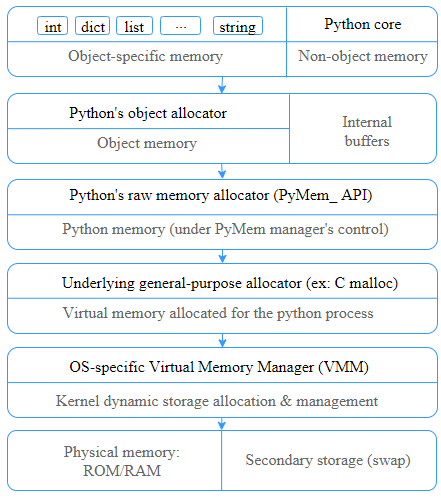

-------
-------
-------

#### **Q5.** What is namespace in Python ? 

A **namespace** is a collection of currently defined symbolic names along with information about the object that each name references. You can think of a namespace as a dictionary in which the keys are the object names and the values are the objects themselves. Each key-value pair maps a name to its corresponding object.

In a Python program, there are four types of namespaces:

1. **Built-in**: It contains the names of all of Python's built-in objects. These are available at all times when Python is running.
2. **Global namespace**: It contains any names defined at the level of the main program. Python creates the global namespace when the main program body starts, and it remains in existence until the interpreter terminates.
3. **Local namespace**: This namespace includes local names inside a function. This namespace is created when a function is **called**, and it only lasts until the function returns.
4. **Enclosing namespace**: It is a namespace created for inner function when an outer function calls another inner function.

In [104]:
# list of all objects in built-in namespace
dir(__builtins__)[0:5]

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError']

In [105]:
# global and local variables example 1

global_var = 10        #global namespace

def foo():
    print('global_var (inside foo):', global_var)
    
    local_var = 5     #local namespace
    print('local_var:', local_var)
    
    global gvfoo
    gvfoo = 100     # global variable defined inside a function

# local var is not defined outside of the local namespace
#print('local_var:', local_var)

foo()

# since it is defined as global variable, it is in global namespace
print('gvfoo (global variable defined inside foo as global):',gvfoo)

global_var (inside foo): 10
local_var: 5
gvfoo (global variable defined inside foo as global): 100


In [106]:
# global and local variables example 2

gv = 200

def foo():
    print(gv) #global variable
foo()

200


In [108]:
gv = 200

def foo():
    # if you try to assign (create) same name, it will be treated as local variable
    # below code will give an error since local variable gv is used before assignment
    gv = gv * 2
    
# it will throw error
#foo()

In [109]:
gv = 200

def foo():
    # if you want to change the value of global variable, define it as global
    global gv
    gv = 100
foo()
print(gv)

100


In [110]:
# local namespace and enclosing namespace
def foo():
    x = 5                 # local namespace
    print('foo:', x)
    
    def bar():
        x = 4             # enclosing namespace
        print('bar:', x)
        
    bar()
    print('foo after calling bar:', x)

foo()

foo: 5
bar: 4
foo after calling bar: 5


-------
-------
-------

#### Q6.  What does <code>nonlocal</code> keyword do?

The nonlocal keyword is used to work with variables inside nested functions, where the variable should not belong to the inner function.
Use the keyword nonlocal to declare that the variable is not local.

In [111]:
def foo():
    x = 5                 # local namespace
    print('foo:', x)
    
    def bar():
        nonlocal x        # this x belongs to outer function
        x = 4             # enclosing namespace
        print('bar:', x)
        
    bar()
    print('foo after calling bar:', x)

foo()

foo: 5
bar: 4
foo after calling bar: 4


-------
-------
-------

#### QQ. What is **\__pycache__** folder ?

- To speed up loading modules, Python caches the compiled version of each module in the **\__pycache__** directory under the name **module.version.pyc.** (Ex: \__pycache__/spam.cpython-36.pyc)
- When a module is imported for the first time (or when the source file has changed since the current compiled file was created) a .pyc file containing the compiled code should be created in a \__pycache__ subdirectory of the directory containing the .py file.(source code)
- At the time when you run a program in python, the interpreter compiles it to bytecode first and after compilation interpreter stores it in the **\__pycache__** folder.
- There will be files with extensions either .pyc or pyo. These are bytecode-compiled and optimized bytecode-compiled versions of your program's files.
- **\__pycache__** makes your program to start a little faster.
- When your script changes, they will be recompiled, and if you delete the files or the whole folder and run your program again, they will reappear.
- If you are using CPython implementation, it can be suppressed by executing python program with 
    - python -B foo.py
    
**Note:** No such folder is created for the standard library, as the standard library is pre-cached when you install Python.

-------
-------
-------

#### QQ. Does Python interpreted or compiled language?

Python is an interpreted language, as opposed to a compiled one, though the distinction can be blurry because of the presence of the bytecode compiler. This means that source files can be run directly without explicitly creating an executable which is then run.

Python is known as interpreted since
- Python's compilation to bytecode is entirely implicit. You never invoke a compiler, you simply run a .py file. The Python implementation (CPython, Jython etc.) compiles the files as needed.
- Python has interactive prompt. You can type Python statemetns and have them immediately executed. This interactivity is usually missing in “compiled” languages.
    - But even at the Python interactive prompt, your Python is compiled to bytecode, and then bytecode is executed. This immediate execution, and Python’s lack of an explicit compile step, are why people call the Python executable “the Python interpreter.”

-------
-------
-------

#### QQ. What does dis module do ?

The **dis module** supports the analysis of CPython bytecode by disassembling it. 

In [112]:
import dis
def myfunc(sometext):
    print('You say:',sometext)
    return 0

dis.dis(myfunc)

  3           0 LOAD_GLOBAL              0 (print)
              2 LOAD_CONST               1 ('You say:')
              4 LOAD_FAST                0 (sometext)
              6 CALL_FUNCTION            2
              8 POP_TOP

  4          10 LOAD_CONST               2 (0)
             12 RETURN_VALUE


-------
-------
-------

#### QQ. What is PYTHONPATH?

Python's behavior is greatly influenced by its environment variables. One of those variables is **PYTHONPATH**.
- It is used to set the path for the user-defined module so that it can be directly imported into a Python program.
- It is also responsible for handling the default search path for Python Modules.
- The **PYTHONPATH** variable holds a string with the name of various directories that need to be added to the **sys.path** directory list by Python.
- The primary use of this variable is to allow users to import modules that are not made installable yet. (not possible to install module via pip, such as a module that defined by user)
- **In other words, the only reason to set PYTHONPATH is to maintain directories of custom Python libraries that you do not want to install in the global default location (i.e., the site-packages directory).**

-------
-------
-------

#### QQ. What are Python modules? What are some of the the commonly used built-in modules in Python?

- Python modules are files consisting of Python code. A module can define **functions, classes and variables**.
- A module is a .py file containing executable code.
- Ex: os, sys, math, random, date time, JSON

-------
-------
-------

#### QQ. Is Python case sensitive?

Python is a case sensitive language.

In [113]:
str1 = 'John'
str2 = 'john'
str1 == str2

False

-------
-------
-------

**QQ. What is type conversion in Python?**

Type conversion refers to the conversion of one data type into another.
- **int()**
- **float()**
- **ord()** : converts characters to unicode code
- **chr()** : inverse of ord() function
- **hex()** : converts integers to hexadecimal
- **oct()** : converts integer to octal
- **str()** : converts number into a string
- **tuple()**, **set()**, **list()**, **dict()**

In [114]:
print(f'{"Number":<10}',f'{"Hexadecimal":<10}',f'{"Octal":>10}')
for i in range(16):
    print(f'{i:<10}',f'{hex(i):<10}',f'{oct(i):>10}')

Number     Hexadecimal      Octal
0          0x0               0o0
1          0x1               0o1
2          0x2               0o2
3          0x3               0o3
4          0x4               0o4
5          0x5               0o5
6          0x6               0o6
7          0x7               0o7
8          0x8              0o10
9          0x9              0o11
10         0xa              0o12
11         0xb              0o13
12         0xc              0o14
13         0xd              0o15
14         0xe              0o16
15         0xf              0o17


In [115]:
char_string = "abcdefgh"
print(f'{"char":<5}', f'{"ord()":<5}')
for i in char_string:
    print(f'{i:<5}', f'{ord(i):<5}')

char  ord()
a     97   
b     98   
c     99   
d     100  
e     101  
f     102  
g     103  
h     104  


-------
-------
-------

#### QQ. What is unicode? What is the difference between unicode and ASCII?

- Unicode is a universal character encoding standard that assigns a unique code to every character and symbol in every language in the world.
- **Unicode** is an IT standard for the consistent encoding, representation, and handling of text expressed in most of the world's writing system.
- The standard is maintained by Unicode Consortium.

The difference between Unicode and ASCII
- Unicode covers letters of many different languages (including English, Greek, Arabic ...), mathematical symbols, historical scripts.
- ASCII is limited to few characters such as uppercase and lowercase letters, symbols, and digits(0-9)

-------
-------
-------

QQ. What is **shebang** line?

- If the first line of a script file starts with <code>#!</code>, it is known as a **shabang** line.
- Linux and other Unix like operating systems have native support for such lines and they are commonly used on such systems to indicate how a script should be executed.
- It defines where the interpreter is located.

Ex: <code>#!/usr/bin/python3</code>

-------
-------
-------

#### QQ. What is the difference between Python **Arrays** and **Lists**?

- Arrays and Lists have the samw way of storing data.
- Arrays are also mutable like Lists.
- But, arrays can hold only a single data type elemenets whereas lists can hold any data type elements.
- If you need to do mathematical computation on arrays and matrices, it is much better to use NumPy arrays.

import array as arr

#array of integer
ex_arr = arr.array('i',[1,2,3,4])
ex_list = [1,2,3,'4']
print(ex_arr)
print(ex_list)

-------
-------
-------

#### QQ. What is <code>lambda</code> function?

- An anonymous function is known as a lambda function.
- It is a quicker way to write functions on the fly. They are used for simple functions to write fewer lines of code.
- This function can have any number of paramters, but can have just one statement.

In [116]:
anonymous_foo = lambda x,y : x*y
anonymous_foo(5,4)

20

-------
-------
-------

#### QQ. What is <code>self</code> in Python?

- Self is an instances or an object of a class.
- In Python, this is explicitly included as the first parameter.
- The self variable in the <code>\__init__</code> method refers to the newly created object while in other methods, it refers to the bject whose method was called.

In [117]:
class myClass:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    
    def increase_age(self,number):
        self.age += number
        
    def __repr__(self):
        return f"Name: {self.name}, Age: {self.age}"
        
person = myClass('John',25)
print(person)
person.increase_age(5)
print(person)

Name: John, Age: 25
Name: John, Age: 30


-------
-------
-------

#### QQ. How does <code>break</code>,<code>continue</code>,<code>pass</code> work in Python?

- <code>break</code>: allows loop termination and the control is transferred to the next statement.
- <code>continue</code>: allows skipping some part of a loop and the control is transferred to the beginning of the loop
- <code>pass</code>: used when you need some block of code syntactically, but you want to skip its execution. This is basically a null operation. Nothing happens when **pass** is executed.

In [118]:
print('Break on 3')
for i in range(10):
    if i == 3:
        break
    print(i, end='-')

print('\n','*'*10)
print('Continue on 3')
for i in range(10):
    if i == 3:
        continue
    print(i, end='-')

Break on 3
0-1-2-
 **********
Continue on 3
0-1-2-4-5-6-7-8-9-

-------
-------
-------

#### QQ. What does [::-1] do?

It is used to reverse the order of an array or a sequence. It does not change the original object, but creates a copy.

In [119]:
list1 = [1,2,3,4,5]
list1[::-1]

[5, 4, 3, 2, 1]

-------
-------
-------

#### QQ. How can you randomize the items of a list in place in Python?

- <code>shuffle</code> method can be used for suffling the sequence.
- It is changing the original object.

In [120]:
from random import shuffle
list1 = ['a','b','c','d']
shuffle(list1)
list1

['a', 'd', 'c', 'b']

-------
-------
-------

#### QQ. What are Python iterators and iterables?

- An iterator is an object that contains a countable number of values.
- An iterator is an object that can be iterated upon, meaning that you can traverse through all the values.
- Technically, in Python, an iterator is an boject which implements the **iterator protocal**, which consist of the methods <code>\_\_iter__()</code> and <code>\__next__()</code>
    - An iterator protocol is a specific class in Python which futher has the <code>\__next__()</code> method.
    - That means every time you ask for the next value, an iterator knows how to compute it.
    - It keeps information about the current state of the **iterable** it is working on.
    
**Iterator vs Iterable**

- Lists, tuples, strings, dictionaries, and sets are all iterable objects. They are iterable **containers** which you can get an iterator from.
- All these objects have a  <code>iter()</code> method which is used to get an iterator.
- When **for loop** is used on iterable, it creates iterator object and executes the <code>next()</code> method for each loop

In [121]:
mytuple = ('apple', 'banana', 'cherry')
myit = iter(mytuple)

print(next(myit))
print(next(myit))
print(next(myit))

# calling next one more time gives StopIteration error
# print(next(myit))

apple
banana
cherry


In [122]:
mystr = 'apple'
myit = iter(mystr)

print(next(myit))
print(next(myit))
print(next(myit))
print(next(myit))
print(next(myit))

# calling next one more time gives StopIteration error
# print(next(myit))

a
p
p
l
e


In [123]:
mytuple = ('apple', 'banana', 'cherry')

for x in mytuple:
    print(x, end='-')

apple-banana-cherry-

**Create an iterator**

- To create an object/class as an iterator you have to implement the methods <code>\_\_iter__()</code> and <code>\__next__()</code> to your object.
- The <code>\_\_iter__()</code> method acts similar (like **\_\_init__**), you can do operations (initializing etc.)
- The <code>\__next__()</code> method also allows you to do operations, and must return the next item in the sequence. (usually it returns the current item and increments the sequence for returning next item in the next call)

- **StopIteration**: If there is no stop criteria, it would continue forever. You can always call next method, there is no limit. 
    - To prevent the iteration to go on forever, we can use the <code>StopIteration</code> statement.
    - In the <code>\__next__()</code> method, we can add a terminating condition to raise an error if the iteration is done a specified number of times.

In [124]:
class myNumbers():
    def __iter__(self):
        self.counter=1
        return self
    
    def __next__(self):
        if self.counter <= 3:
            temp = self.counter
            self.counter += 1
            return temp
        else:
            raise StopIteration
        
    

myObject = myNumbers()
myiter = iter(myObject)

print(next(myiter))
print(next(myiter))
print(next(myiter))

# calling next one more time gives StopIteration error
# print(next(myit))

1
2
3


-------
-------
-------

#### QQ. How can you generate random numbers in Python?

**Random** module is the standard module that is used to generate a random number.
- <code>random()</code>: return the floating point number that is in the range of [0,1)
- <code>randrange(a,b)</code>: return an integer in the range of [a,b)
- <code>uniform(a,b)</code>: return a floating point number in the range of [a,b)
- <code>normalvariate(mean,stdev)</code>: return a floating point number based on normal distribution

In [125]:
import random
print('random():',random.random())
print('randrange(5,10):',random.randrange(5,10))
print('random.uniform(5,10):',random.uniform(5,10))
print('random.normalvariate(100,10):',random.normalvariate(100,25))

random(): 0.17382677060964302
randrange(5,10): 8
random.uniform(5,10): 8.545485393540508
random.normalvariate(100,10): 86.18134317223394


-------
-------
-------

#### QQ. What is the difference between range & xrange?

- <code>range()</code> returns a range object (a type of iterable). It uses **lazy evaluation** strategy. Instead of creating a huge list of elements in range, it creates range object that represents the required elements in the given range. (**without storing them explicitly in memory**)
- <code>xrange()</code> returns the **generator object** (xrange object) that can be used to display numbers only by looping. Only particular range is displayed on demand and hence called **lazy evaluation**.
- <code>xrange()</code> function is deprecated in Python 3.

In [126]:
type(range(5))

range

-------
-------
-------

#### QQ. What is pickling and unpickling?

- The **pickle** module implements binary protocols for serializing and de-serializing a Python object structure.
- 'Pickling' is the process whereby a Python object hierarchy is converted into a byte stream, and 'Unpickling' is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.
- Pickling and Unpickling is alternatively known as **serialization** and **marshalling**.
- Its protocol is specific to Python. If you want to use data across different programming languages, pickle is not recommended.
    - It is possible to construct **malicious** pickle data which will execute arbitrary code during unpickling. The pickle module is not secure.
- JSON is a lightweight format for data-interchange, that is easily readable by humans. It is standardized and language-independent. This is a serious advantage over pickle. It is also more secure and much faster than pickle.

In [127]:
import pickle
sample_dict = {'name':['John','Alice'], 'age':[24,26]}

filename = 'ex_file'
# open a file in write/binary mode
outfile = open(filename, 'wb')

pickle.dump(sample_dict,outfile)
outfile.close()

# open a file in read/binary mode
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
print('Read dictionary:', new_dict)
infile.close()

Read dictionary: {'name': ['John', 'Alice'], 'age': [24, 26]}


-------
-------
-------

#### QQ. What does the <code>yield</code> keyword do?

- <code>yield</code> is a keyword in Python that is used to return from a function without destroying the states of its local variable and when the function is called, the execution starts from the last yield statement.
- Any function that contains a <code>yield</code> keyword is termed as **generator.
- Hence, yield is what makes a generator.

-------
-------
-------

#### QQ. What are the generators in Python?

There is a lot of work in building an **iterator** in Python. We have to implement a class with <code>\__iter__()</code> and <code>\__next__()</code> method, keep track of internal states, and raise <code>StopIteration</code> when there are no values to be returned.
- **Generators** are a simple way of creating iterators. All the work mentioned above are automatically handled by generators in Python.
- A **generator** is a function that returns an object(iterator) which we can iteratre over(one value at a time)
- It is simply a function but with a <code>yield</code> statement instead of <code>return</code>.
- If a function contains at least one <code>yield</code> statement (it may contain other yield or return statements), it becomes generator function.
- The difference is that while a <code>return</code> statement terminates a function entirely, <code>yield</code> statemetn pauses the function saving all its states and later continues from there on successive calls.

**Differences between Generator function and Normal Function**
- Generator function contains one or more <code>yield</code> statements.
- When called, it <span style='color:red'>returns an object(iterator)</span> but does not start execution immediately.
- Methods like <code>\_\_iter__()</code> and <code>\_\_next__()</code> are implemented automatically. So we can iterate throug the items using <code>next()</code>
- Once the function yields, the function is paused an the control is transferred to the caller.
- Local variables and their states are remembered between successive calls.
    - Unlike normal functions, the local variables are not destroyed when the function yields.
    - The generator object <span style='color:red'>can be iterated only once.</span>
- Finally, when the function terminates, <code>StopIteration</code> is raised automatically on further calls.


In [128]:
# a simple generator function
def my_gen():
    n=1
    print('First print')
    # generator function contains at least 1 yield statement
    yield n
    
    n += 1
    print('Second print')
    yield n
    
    n += 1
    print('Third print')
    yield n

a = my_gen()
print(next(a))
print(next(a))
print(next(a))

# next iteration will give StopIteration error
#print(next(a))

First print
1
Second print
2
Third print
3


**Using with For loop**
- A for loop takes an iterator and iterates over it using <code>next()</code> function.
- It automatically ends when <code>StopIteration</code> is raised.

In [129]:
# calling via loop

for item in my_gen():
    print(item)

First print
1
Second print
2
Third print
3


**Generators with a Loop**

Normally, the generator functions are implemented with a loop having a suitable terminating condition.

In [130]:
#reverse string generator
def rev_str(my_str):
    
    for i in range(len(my_str)-1, -1, -1):
        yield my_str[i]

for char in rev_str('sometext'):
    print(char, end='')

txetemos

**Python Generator Expression**

- Simple generators can be created on the fly using **generator expressions**.
- Similar to the lambda functions which create anonymous functions, generator expressions create anonymous generator functions.
- The syntax for generator expression is similar to the of a list comprehension. **The major difference is that a list comprehension produces the entire list while the generator expression produces one item at a time.**
- They have a **<span style='color:green'>lazy evaluation</span>** (producing items only when asked for).
    - For this reason, a generator expression is much more **memory efficient** than an equivalent list comprehension.

In [131]:
list1 = [x**2 for x in range(5)]
print(list1)

a = (x**2 for x in range(5))
print(a)

print(next(a))
print(next(a))
print(next(a))

[0, 1, 4, 9, 16]
<generator object <genexpr> at 0x000002369E1C8D48>
0
1
4


In [132]:
# remember: it starts where it left.
for item in a:
    print(item)

9
16


- **Using Generator Expressions as Argument**
    - Generator expressions can be used as function arguments. When used in such a way, the round parantheses can be dropped.

In [133]:
sum(x*2 for x in range(3)) #sum 0,2,4

6

In [134]:
max(x*2 for x in range(3))

4

**Use of Python Generators**
- **Easy to implement**: Generators can be implemented in a clear and concise way as compared to their iterator class counterpart.
- **Memory Efficient**: A normal function to return a sequence will create the entire sequence in memory before returning the result. This is an overkill, if the number of items in the sequence is very large. Generators produces one item at a time.
- **Represent Infinite Stream**: Generators are excellent mediums to represent an infinit stream of data. Infinite streams cannot be stored in memory, and since generators produce only one item at a time, they can represent an infinite stream of data.
- **Pipelining Generators**: Multiple generators can be used to pipeline a series of operations.

In [135]:
# Easy to Implement

# iterator that takes power of 2
# a lot of codes
class PowTwo:
    def __init__(self, max=0):
        self.n = 0
        self.max = max
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.n > self.max:
            raise StopIteration
            
        result = self.n ** 2
        self.n += 1
        return result
    

myObj = PowTwo(max=2)
myIter = iter(myObj)

print(next(myIter))
print(next(myIter))
print(next(myIter))

# next call raise StopIteration error
# print(next(myIter))


0
1
4


In [136]:
# generator that takes power of 2
def PowTwoGen(max=0):
    n = 0
    while n <= max:
        yield n**2
        n +=1

for i in PowTwoGen(max=3):
    print(i)

0
1
4
9


In [137]:
# Represent Infinite stream

def all_even():
    n = 0
    while True:
        y

In [138]:
# Pipelining Generators

def fibonacci_numbers(nums):
    a, b = 0, 1
    for _ in range(nums):
        a, b = b, a+b
        yield a

def square(nums):
    for num in nums:
        yield num**2
        
print(sum(square(fibonacci_numbers(10))))

4895


-------
-------
-------

#### QQ. What is difference between assignment, shallow copy and deepcopy?

**Assignment**
- By assignment you are getting different names for the same object.
- Normal assignment operations simply point the new variable towards the existing object.

**Shallow copy**
- A shallow copy constructs a new compound object and then inserts references into it to the objects found in the original.

**Deep copy**
- A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original

-------

**Ex1 (Assignment)**: Since they are referring the same object, the changes are happening for both variables.

In [139]:
# assignment
a = [1,2,3]
b = a

# both are pointing to the same memory location
id(a) == id(b)

True

In [140]:
#changing item
a[0] = 100
print(b)

[100, 2, 3]


-------

**Ex2 (Shallow Copy)**: 
- The copy is now in different memory location. However it has the references to the original object's items.
- When an **immutable** item is changed in original object, original object refers to another memory location. (since the item is immutable it can not be changed in the same location)
    - However, copied object still referring to the same memory location. That's why its content is not changing.
- When an **mutable** item is changed in original object, original object can refer to same memory location. (since the item is mutable it can be changed in the same location)
    - Copied object still referring to the same memory location. So, its content also changes.

In [141]:
# shallow copy
a = [1,(2,3),['a','b','c']]
b = a.copy()

# new object created after copy which includes references to the objects in original
# a and b are not refering to same memory location
print(id(a) == id(b))

# however, the items are same objects
print(id(a[0]) == id(b[0]))
print(id(a[1]) == id(b[1]))
print(id(a[2]) == id(b[2]))

False
True
True
True


In [142]:
#changing item [immutable] 
# b[0] still referencing the object 1.
a[0] = 100
print(b)

[1, (2, 3), ['a', 'b', 'c']]


In [143]:
#changing item [immutable] 
# b[0] still referencing the object (2,3).
a[1] = (200,300)
print(b)

[1, (2, 3), ['a', 'b', 'c']]


In [144]:
#changing item [mutable]
#b[2] still referencing the original list.
# since the list is modified. b is also changed.
a[2][0] = 'A'
print(b)

[1, (2, 3), ['A', 'b', 'c']]


**Original Object** (Address 100)

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 2      | a,b,c |

**Shallow Copied Object** (Address 200)

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 2     | a,b,c |

- Change Original Object
- Changes on immutable objects results in address change since it will refer to another object
- Changes on mutable objects wont change address since the change will be done on object itself

| Address| Item  |
|--------|-------|
| 40     | 100   |
| 1      | 2     |
| 2      | A,b,c |

- Shallow Copied Object after change

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 2      | A,b,c |

-------

**Ex3 (Deep Copy)**: 
- The copy is in different memory location. It has the references to the original object's **immutable** items.
- When an **immutable** item is changed in original object, original object refers to another memory location. (since the item is immutable it can not be changed in the same location)
    - However, copied object still referring to the same memory location. That's why its content is not changing.
- When an **mutable** item is changed in original object, original object can refer to same memory location. (since the item is mutable it can be changed in the same location)
    - However, the copied object already was referencing to the another location when it is created. So, this change would not affect the copied object.

In [145]:
import copy
# Deep Copy

a = [1,2,['a','b','c']]
b = copy.deepcopy(a)

# new object created after copy.
# a and b are not refering to same memory location
print(id(a) == id(b))

# only the immutable items are same object
print(id(a[0]) == id(b[0]))
print(id(a[1]) == id(b[1]))
print(id(a[2]) == id(b[2]))

False
True
True
False


In [146]:
#changing item [immutable] 
# b[0] still referencing the object 1.
a[0] = 100
print(b)

[1, 2, ['a', 'b', 'c']]


In [147]:
#changing item [mutable]
#b[2] still referencing the original list.
# since the list is modified. b is also changed.
a[2][0] = 'A'
print(b)

[1, 2, ['a', 'b', 'c']]


**Original Object** (Address 100)

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 2      | a,b,c |

**Deep Copied Object** (Address 200)

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 10     | a,b,c |

- Change Original Object
- Changes on immutable objects results in address change since it will refer to another object
- Changes on mutable objects wont change address since the change will be done on object itself

| Address| Item  |
|--------|-------|
| 40     | 100   |
| 1      | 2     |
| 2      | A,b,c |

- Deep Copied Object after change

| Address| Item  |
|--------|-------|
| 0      | 1     |
| 1      | 2     |
| 10      | a,b,c |

-------
-------
-------

#### QQ. What is named tuple? What are the differences between named tuple, dictionary?

- **collections** module implements specialized container datatypes providing alternatives to Python's general purpose built-in containers dict, list, set, and tuple.
- <code>namedtuple()</code> is a factory function for creating tuple subclasses with named fields.
- **Named tuples** assign meaning to each position in a tuple and allow for more readable, self-documenting code. They can be used wherever regular tuples are used, and they add the ability to access fields by name instead of position index.
    - Similar to the dictionaries, they contain keys that are hashed to a particular value.
    - Unlike dictionaries, it supports access both from key value and iteration (by indices). (while dictionaries support access only from key value.)
    - Unlike dictionaries, named tuples are ordered.

In [148]:
from collections import namedtuple

Person = namedtuple('Person','name age gender')
p = Person(name='John', age=25, gender='M')

# access using index
print('Access using index:',p[0], p[1], p[2])
print('Access using keys:',p.name, p.age, p.gender)

Access using index: John 25 M
Access using keys: John 25 M


**Conversion Operations**
- <code>_make()</code>: return a <code>namedtuple()</code> from the iterable passed as argument
- <code>_asdict()</code>: return a <code>OrderedDict()</code> as constructed from the mapped values of namedtuple()
- using ** (double star) operator: convert a dictionary into the namedtuple().

In [149]:
list1 = ['Jane', 20, 'F']
Person._make(list1)

Person(name='Jane', age=20, gender='F')

In [150]:
p._asdict()

OrderedDict([('name', 'John'), ('age', 25), ('gender', 'M')])

In [151]:
dict1 = {'name': 'Alex', 'age':30, 'gender':'M'}
Person(**dict1)

Person(name='Alex', age=30, gender='M')

**Additional Operations**
- <code>_fields</code>: return all the key names of the namespace declared
- <code>_replace()</code>: is used to change the values mapped with the passed name

In [152]:
Person._fields

('name', 'age', 'gender')

In [153]:
p._replace(name='KrAlex')

Person(name='KrAlex', age=25, gender='M')

-------
-------
-------

#### QQ. What is difference between **ordered dictionary** and **standard dictionary**?

Note: From Python 3.6 onwards, the standard <code>dict()</code> maintains the insertion order.

- <code>OrderedDict()</code> is a dictionary subclass that remembers the order that keys were first inserted.
- The only difference than <code>dict()</code> is that the <code>OrderedDict()</code> **preserves the order** in which the keys are inserted. A regular dict does not tract the insertion order, and iterating it gives the values in an arbitrary order.

In [154]:
from collections import OrderedDict

od = OrderedDict(name = 'John')
od['age'] = 20
od['gender'] = 'M'

for key,value in od.items():
    print(key,value)

name John
age 20
gender M


-------
-------
-------

#### QQ. Explain Python <code>\_\_name_\_</code> variable?

- When a python script is executed, the <code>\_\_name_\_</code> variable is set to **\_\_main_\_**
- When a python script is executed which import a module, the <code>\__name__</code> variable of the module is set to **module name**.
- By using this variable, it is possible to control the code parts being executed depending on how a script is called (main program or imported)

In [155]:
print(__name__)

__main__


In [156]:
if __name__ == '__main__':
    print('This script is executed as main program')

This script is executed as main program


-------
-------
-------

#### What are **docstrings** in Python?

**Docstrings** are documentation strings that is used in the class, module, function, or method definition.
- **docstrings** are accessible from the doc attribute <code>\_\_doc__</code> for any of the python objects and also with the built in <code>help()</code> function.

In [157]:
import math

math.__doc__

# To see detailed explanation
#help(math)

'This module provides access to the mathematical functions\ndefined by the C standard.'

In [158]:
def power(x,y):
    """Returns first parameter to power of second parameter"""
    return x**y

In [159]:
power.__doc__

'Returns first parameter to power of second parameter'

In [160]:
help(power)

Help on function power in module __main__:

power(x, y)
    Returns first parameter to power of second parameter



-------
-------
-------

#### QQ. What does <code>is</code> keyword mean in Python?

- It is **True** if the operands are identical (refer to the same object)
- They should be the same object (refer to same memory location) to be identical

In [161]:
a = [1,2,3]

#shallow copy
b = a.copy()

In [162]:
# a and b refers different memory locations
id(a) == id(b)

False

In [163]:
# however b includes references to the items inside a
print(id(a[0]) == id(b[0]))
print(id(a[1]) == id(b[1]))
print(id(a[2]) == id(b[2]))

True
True
True


In [164]:
# a is not b
a is b

False

-------
-------
-------

#### QQ. What is <code>dir()</code> function in Python?

<code>dir()</code> is a powerful inbuilt function in Python3, which returns list of the **attributes and methods** of any object (functions, modules, strings, lists, dictionaries etc.)

- For **Class** objects, it returns a list of names of all the valid attributes and base attributes as well.
- For **Modules/Library** objects, it returns a list of names of all the attributes contained in that module.
- If no parameters are passed it returns a list of names in the current local scope.

In [166]:
print(dir(myClass))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'increase_age']


In [168]:
print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


In [170]:
def ex_foo():
    a = [1,2,3]
    b = 4
    # print list of names in the current local scope
    print(dir())
    
ex_foo()

['a', 'b']


-------
-------
-------

#### QQ. Compare Python with Java&C in terms of variable assignments?

|                       | Python                                               | Java&C                                                              |
|-----------------------|------------------------------------------------------|---------------------------------------------------------------------|
| Statement             | x = 10                                               | int x = 10                                                          |
| Data Type declaration | Dynamically typed. Not needed                        | Statically typed. Mandatory.                                        |
| What is 10 ?          | An object created on heap memory.                    | A primitive data stored in 4 bytes (Java), 2 bytes (C)              |
| What does x contain?  | Reference to object 10                               | Memory location where 10 is stored                                  |
| x = x + 1             | x starts referring to a new object whose value is 11 | x continues to pointing the same memory, with the value equal to 11 |
| x = 10 y = 10         | Both x and y will refer to same object.              | x and y are two variables pointing to different memory locations.   |

what is memory leak

what is GIL ? 

QQ. What is itertools?

In [ ]:
References

- geeksforgeeks
- programiz
- stackoverflow